# Библиотеки и инструменты для анализа данных. Математика в машинном обучении
## Часть 4. Обзор библиотеки Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [ ]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [ ]:
s = pd.Series(np.random.randn(5),
              index = ['a', 'b', 'c', 'd', 'e'])
print(s)

a   -1.007502
b    0.061104
c    1.143353
d   -1.453542
e   -0.211996
dtype: float64


**Индексирование возможно в виде s.Name или s['Name'].**

In [ ]:
s['b']

0.06110399123440321

**Series поддерживает пропуски в данных.**

In [ ]:
s.c = np.nan # Series can contain missing values
print(s)

a   -1.007502
b    0.061104
c         NaN
d   -1.453542
e   -0.211996
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [ ]:
print('Second element of s is', s[1], '\n')
# Smart indexing
print(s[:3], '\n')
print('There are', len(s[s > 0]), 'positive elements in s\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(s))

Second element of s is 0.06110399123440321 

a   -1.007502
b    0.061104
c         NaN
dtype: float64 

There are 1 positive elements in s

a    0.365130
b    1.063009
c         NaN
d    0.233741
e    0.808968
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [ ]:
df1 = pd.DataFrame(np.random.randn(5, 3),
                   index=['o1', 'o2', 'o3', 'o4', 'o5'],
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,1.024179,1.091667,-0.271237
o2,-1.012002,0.418670,-0.690841
o3,-0.651692,-0.511138,0.685974
o4,0.715706,-1.533941,-0.036560
o5,-0.908534,-0.882166,-0.712486


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [ ]:
df2 = pd.DataFrame({'A': np.random.random(5),
                    'B': ['a', 'b', 'c', 'd', 'e'],
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.785967,a,False
1,0.139713,b,False
2,0.578390,c,False
3,0.925927,d,True
4,0.703388,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [ ]:
print('The element in position 3, B is', df2.at[3, 'B'], '\n')
print(df2.loc[[1, 4], ['A', 'B']])

The element in position 3, B is d 

          A  B
1  0.594549  b
4  0.621616  e


**Изменение элементов и добавление новых:**

In [ ]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.928590,a,False
1,0.594549,b,False
2,0.130951,f,False
3,0.366395,d,True
4,0.621616,e,True


In [ ]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.928590,a,False
1,0.594549,b,False
2,0.130951,f,False
3,0.366395,d,True
4,0.621616,e,True
5,3.141500,c,False


In [ ]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,0.735197,0.537759,-1.167551
o2,0.524376,0.213782,1.574378
o3,0.389304,0.905378,0.347247
o4,1.121879,0.43371,0.134348
o5,-0.524477,0.365915,0.140590
0,0.928590,a,0.000000
1,0.594549,b,0.000000
2,0.130951,f,0.000000
3,0.366395,d,1.000000
4,0.621616,e,1.000000


#### Обработка пропущенных значений

In [ ]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
o1,0.735197,0.537759,-1.167551
o2,NaN,0.213782,1.574378
o3,0.389304,0.905378,0.347247
o4,1.121879,0.433710,NaN
o5,-0.524477,0.365915,0.140590


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [ ]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [ ]:
df1.dropna(how='any')

,A,B,C
o1,0.735197,0.537759,-1.167551
o3,0.389304,0.905378,0.347247
o5,-0.524477,0.365915,0.140590


**Пропуски можно заменить каким-то значением.**

In [ ]:
df1[['B','C']].fillna(0)

,B,C
o1,0.537759,-1.167551
o2,0.213782,1.574378
o3,0.905378,0.347247
o4,0.433710,0.000000
o5,0.365915,0.140590


## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [ ]:
df = pd.read_csv('../../data/beauty.csv', sep = ';')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/beauty.csv'

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

NameError: name 'df' is not defined

**Посмотрим на размер данных и названия признаков.**

In [ ]:
print(df.shape)
print(df.columns.values)

NameError: name 'df' is not defined

**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [ ]:
df['exper']


0       30
1       28
2       35
3       38
4       27
5       20
6       12
7        5
8        5
9       12
10       3
11       6
12      19
13       8
14      12
15      17
16       7
17      12
18      10
19       7
20       7
21      19
22      33
23      32
24      12
25      24
26      29
27      17
28      41
29      40
        ..
1230    18
1231    13
1232    36
1233     4
1234     8
1235    24
1236    31
1237    16
1238    10
1239    10
1240    12
1241    20
1242    13
1243     9
1244    15
1245    34
1246     8
1247     3
1248    19
1249    10
1250    13
1251     7
1252    21
1253    10
1254    20
1255    25
1256     4
1257    35
1258    15
1259    24
Name: exper, dtype: int64

Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [ ]:
df.head()

    wage  exper  union  goodhlth  black  female  married  service  educ  looks
0   5.73     30      0         1      0       1        1        1    14      4
1   4.28     28      0         1      0       1        1        0    12      3
2   7.96     35      0         1      0       1        0        0    10      4
3  11.57     38      0         1      0       0        1        1    16      3
4  11.42     27      0         1      0       0        1        0    16      3

**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [ ]:
df.sort(columns=['female','wage'], ascending = [True, False]).head(20)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3
299,26.24,24,0,1,0,0,1,0,12,3
1108,26.24,37,0,1,0,0,1,0,12,2
1113,26.24,37,0,1,0,0,1,0,12,3
396,26.22,17,0,1,0,0,1,1,17,3
338,25.64,28,0,1,0,0,1,0,16,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [ ]:
df['goodhlth'].mean()

0.93333333333333335

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [ ]:
df[df['female'] == 0]['wage'].max()

41.670000000000002

In [ ]:
df['female'] == 1

0        True
1        True
2        True
3       False
4       False
5        True
6       False
7       False
8        True
9        True
10       True
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1230    False
1231    False
1232    False
1233    False
1234     True
1235    False
1236    False
1237    False
1238    False
1239    False
1240    False
1241    False
1242    False
1243    False
1244    False
1245    False
1246    False
1247    False
1248    False
1249    False
1250    False
1251    False
1252    False
1253     True
1254     True
1255     True
1256     True
1257     True
1258     True
1259     True
Name: female, dtype: bool

**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [ ]:
df[(df['female'] == 1) & (df['union'] > 0) & (df['exper'] < 10)]['wage'].max()

77.719999999999999

Извлечь строки с конкретными номерами можно с помощью метода **loc**. Это может быть использовано при разбиении выборки на части. Для примера возьмем случайную подвыборку размера 5.

In [ ]:
df.loc[np.random.randint(df.shape[0], size = 5)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1088,3.85,3,0,1,0,0,1,1,10,4
747,10.99,22,1,0,0,0,1,0,12,3
305,2.08,23,0,1,0,0,1,0,12,4
625,5.34,5,0,1,0,1,0,0,10,3
862,3.75,20,0,1,0,1,1,0,13,2


In [ ]:
def gender_to_string(is_female):
    return 'female' if is_female else 'male'

# df['female'].apply(gender_to_string)
df['female'].apply(lambda is_female: 'female' if is_female else 'male')

0       female
1       female
2       female
3         male
4         male
5       female
6         male
7         male
8       female
9       female
10      female
11        male
12        male
13        male
14        male
15        male
16        male
17        male
18      female
19      female
20        male
21        male
22        male
23        male
24        male
25        male
26        male
27        male
28        male
29        male
         ...  
1230      male
1231      male
1232      male
1233      male
1234    female
1235      male
1236      male
1237      male
1238      male
1239      male
1240      male
1241      male
1242      male
1243      male
1244      male
1245      male
1246      male
1247      male
1248      male
1249      male
1250      male
1251      male
1252      male
1253    female
1254    female
1255    female
1256    female
1257    female
1258    female
1259    female
Name: female, dtype: object

**Применение функции к каждому столбцу:**

In [ ]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [ ]:
g = df.groupby('looks')
g.mean()

,wage,exper,union,goodhlth,black,female,married,service,educ
looks,,,,,,,,,
1,4.621538,27.000000,0.230769,0.846154,0.153846,0.384615,0.615385,0.307692,10.000000
2,5.328803,18.922535,0.232394,0.936620,0.035211,0.380282,0.711268,0.302817,12.105634
3,6.504598,19.491690,0.310249,0.921053,0.080332,0.322715,0.716066,0.254848,12.421053
4,6.299341,15.406593,0.219780,0.956044,0.074176,0.373626,0.651099,0.299451,13.074176
5,7.388421,11.631579,0.157895,1.000000,0.052632,0.421053,0.421053,0.263158,13.368421


In [ ]:
for (gender, sub_df) in df.groupby('female'):
    print(gender)
    print(sub_df['wage'].median())

0
6.41
1
3.75


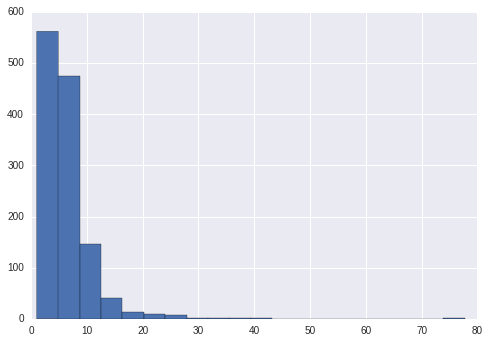

In [ ]:
df['wage'].hist(bins = 20)

In [ ]:
df['looks'].value_counts()

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

**Обращение к конкретной группе:**

In [ ]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

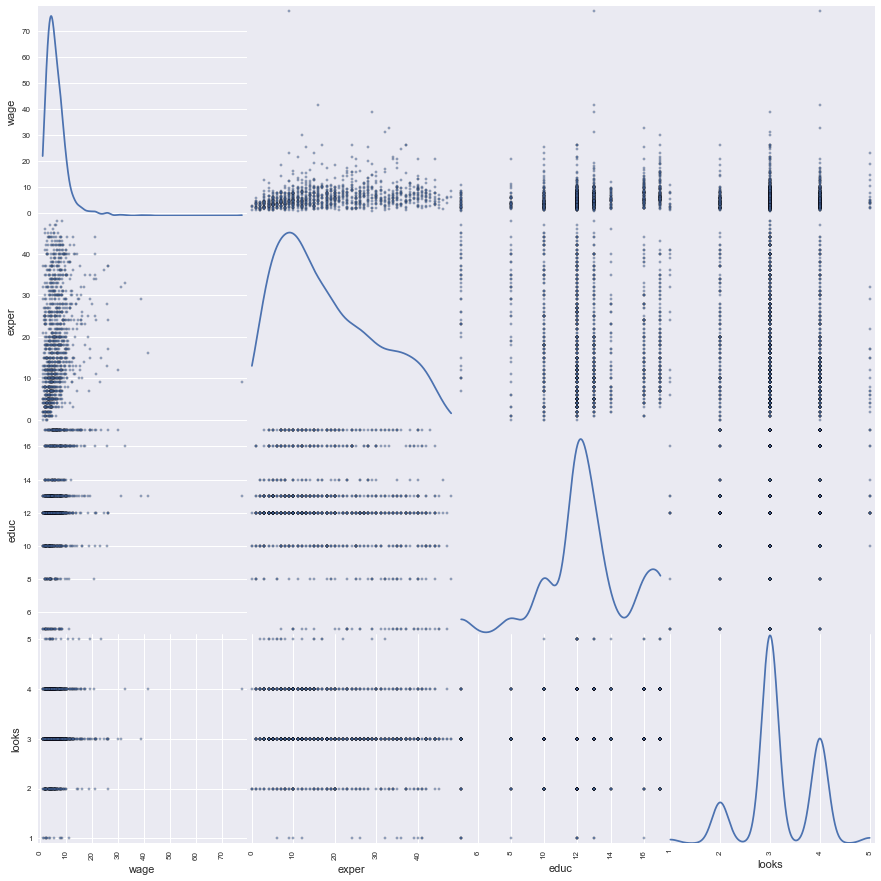

In [ ]:
pd.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']],
                  figsize=(15, 15), diagonal='kde')
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

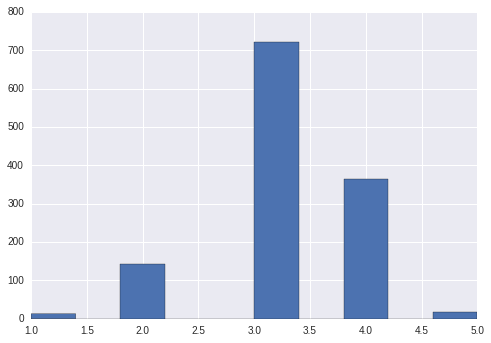

In [ ]:
df['looks'].hist()
plt.show()

**Или сразу для всех:**

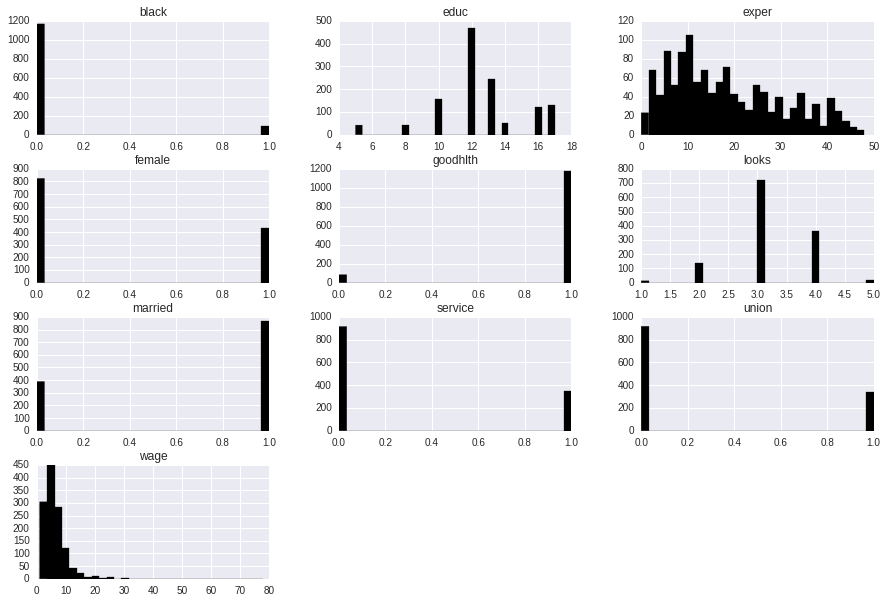

In [ ]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

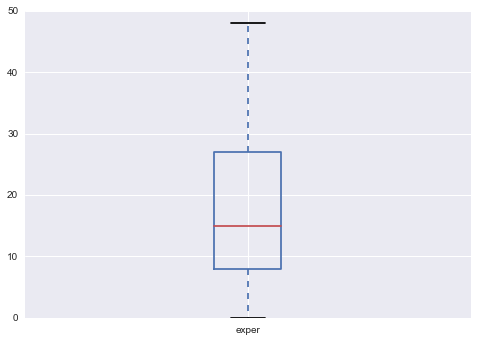

In [ ]:
df.boxplot(column='exper')
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

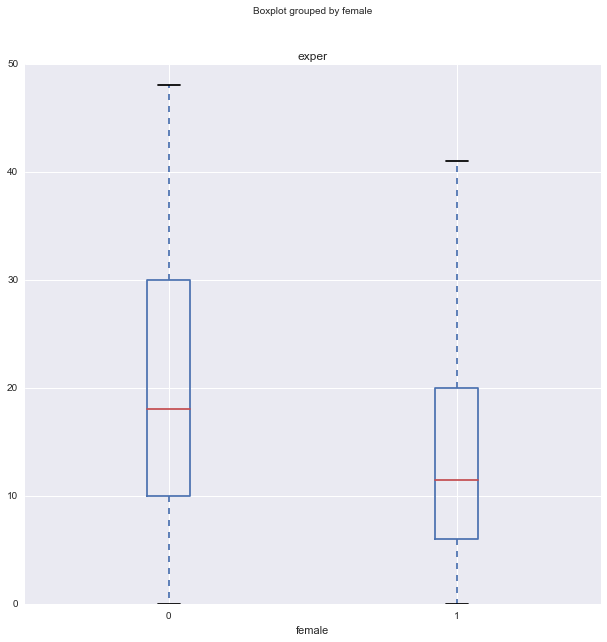

In [ ]:
df.boxplot(column='exper',  by='female', figsize=(10,10))
plt.show()